In [7]:
from enum import auto
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)
dados["finalizado"] = dados["nao_finalizado"].map({1: 0, 0: 1})
#sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")
#sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado",col="finalizado")

# jogar fora
dados = dados.query("horas_esperadas > 0")
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

SEED = 20

raw_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_x)
treino_x = scaler.transform(raw_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma="auto")
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 68.52%


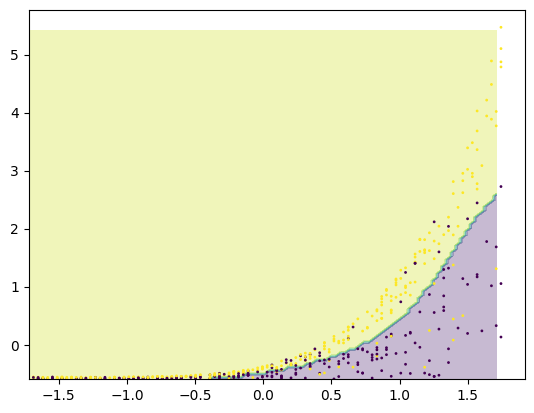

In [9]:
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_ [xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_col1, data_col2, c=teste_y, s=1)